# Point intro to TF

### Load dependencies

In [1]:
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)
import matplotlib.pyplot as plt
import pandas as pd

### Create a small data set

In [2]:
xs = [0., 1., 2., 3., 4., 5., 6., 7.] # feature (independent variable)
ys = [-.82, -.94, -.12, .26, .39, .64, 1.02, 1.] # labels (dependent variable)

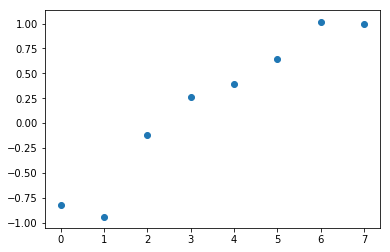

In [3]:
% matplotlib inline
fig, ax = plt.subplots()
_= ax.scatter(xs, ys)

### Define Variables

In [4]:
m = tf.Variable(-0.5)
b = tf.Variable(1.0)

### Define cost function

In [5]:
total_error = 0.0
for x,y in zip(xs, ys):
    y_model = m*x + b
    total_error += (y-y_model)**2

### Define optimizer

In [6]:
optimizer_op = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(total_error)

### Define initializer

In [7]:
initializer_op = tf.global_variables_initializer()

### Execute Session!

In [8]:
with tf.Session() as session:
    session.run(initializer_op)
    
    n_epochs = 10000
    for i in range(n_epochs):
        session.run(optimizer_op)
        
    slope, intercept = session.run([m, b])

In [9]:
slope

0.29702243

In [10]:
intercept

-0.86082667

In [11]:
y_hat = intercept + slope*np.array(xs)

In [12]:
pd.DataFrame(list(zip(ys, y_hat)), columns=('y', 'y_hat'))

,y,y_hat
0,-0.82,-0.860827
1,-0.94,-0.563804
2,-0.12,-0.266782
3,0.26,0.030241
4,0.39,0.327263
5,0.64,0.624285
6,1.02,0.921308
7,1.00,1.218330


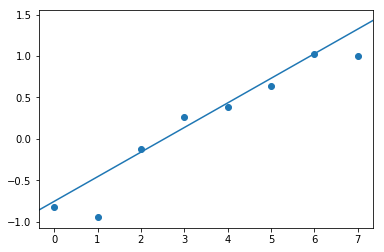

In [16]:
fig, ax = plt.subplots()

ax.scatter(xs, ys)
x_min, x_max = ax.get_xlim()
y_min, y_max = intercept, intercept + slope*(x_max - x_min)

ax.plot([x_min, x_max], [y_min, y_max])
_ = ax.set_xlim([x_min, x_max])